In [312]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [314]:
data=pd. read_csv(r"/content/drive/MyDrive/camera_dataset.csv")

In [315]:
data

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [316]:
data.shape


(1038, 13)

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [318]:
data.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [319]:
data.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [320]:
data['Macro focus range'].median()

6.0

In [321]:
data['Storage included'].median()

16.0

In [322]:
data['Weight (inc. batteries)'].median()

226.0

In [323]:
data['Dimensions'].median()

101.0

In [324]:
data['Macro focus range']. fillna(6, inplace=True)



In [325]:


data['Storage included']. fillna(16, inplace=True)



In [326]:


data['Weight (inc. batteries)'].fillna(226, inplace=True)



In [327]:


data['Dimensions']. fillna(101, inplace=True)

In [328]:
data.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

In [329]:
data.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')

In [330]:
data.nunique()

Model                      1038
Release date                 14
Max resolution               99
Low resolution               70
Effective pixels             16
Zoom wide (W)                25
Zoom tele (T)               100
Normal focus range           32
Macro focus range            29
Storage included             44
Weight (inc. batteries)     237
Dimensions                  101
Price                        43
dtype: int64

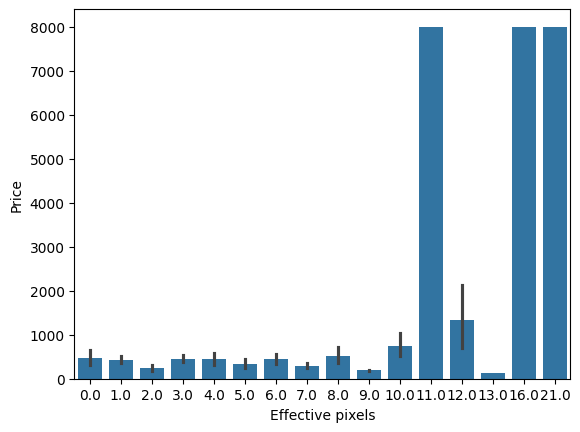

In [331]:
sns.barplot(x='Effective pixels',y='Price',data=data)
plt.show()

<ipython-input-332-6fc6fa728931>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')


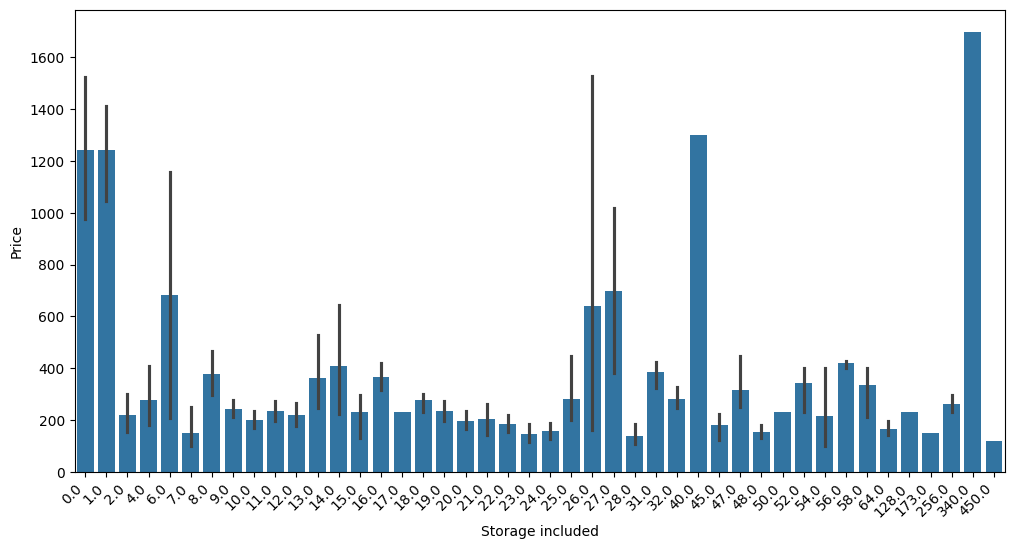

In [332]:
plt.figure(figsize=(12, 6))
barplot=sns.barplot(x='Storage included',y='Price',data=data)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')
plt. show()

<ipython-input-333-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

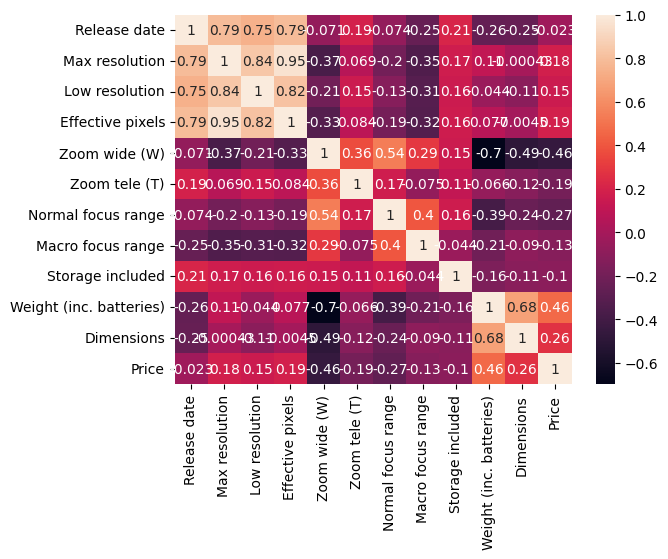

In [333]:
sns.heatmap(data.corr(),annot=True)

In [334]:
from sklearn.preprocessing import LabelEncoder

In [335]:
le=LabelEncoder()

In [336]:
data['Model']=le.fit_transform(data['Model'])

In [337]:
data

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1033,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,1034,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,1035,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,1036,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


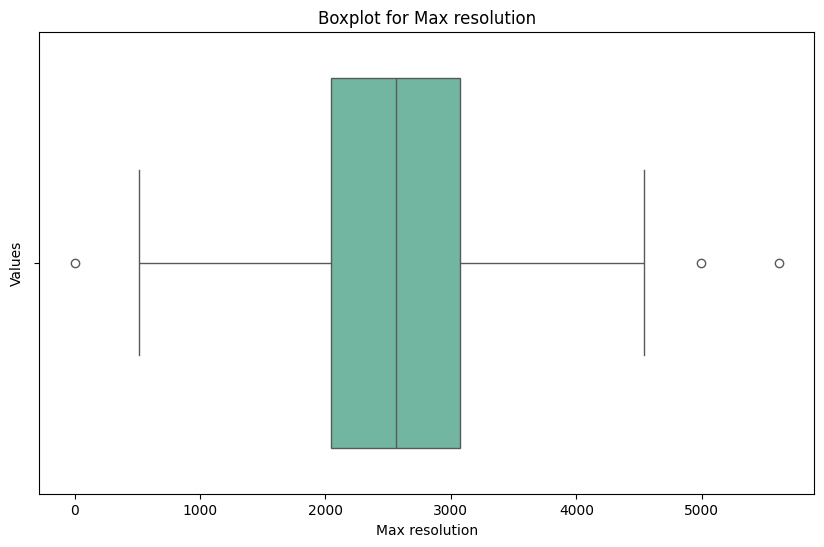

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


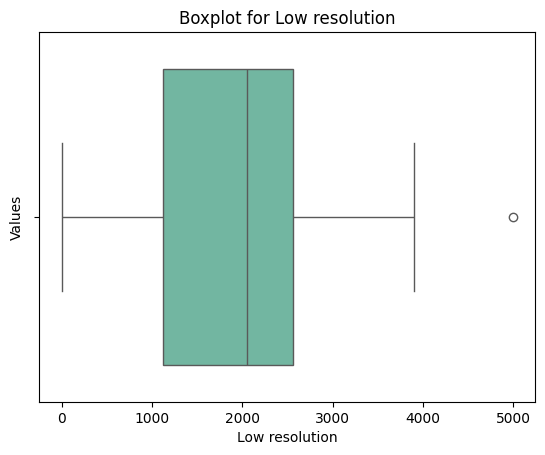

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


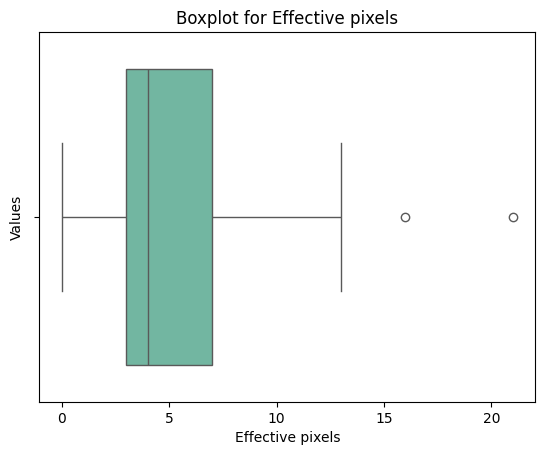

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


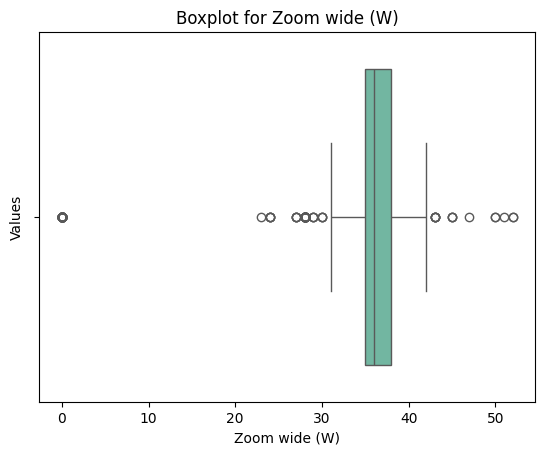

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


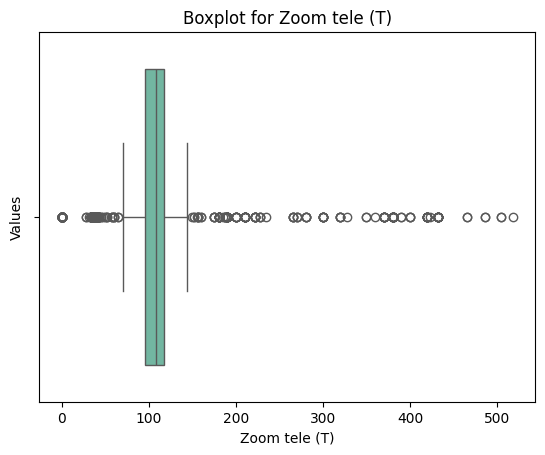

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


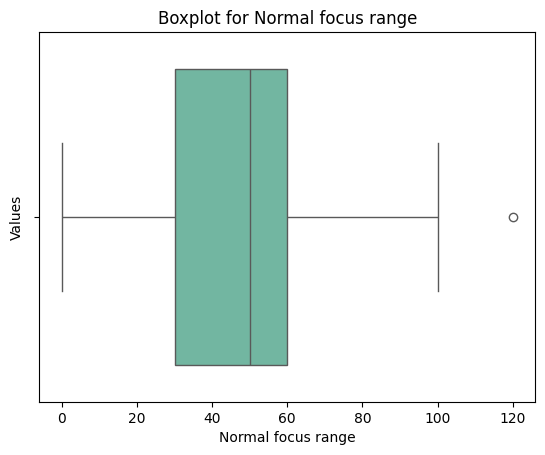

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


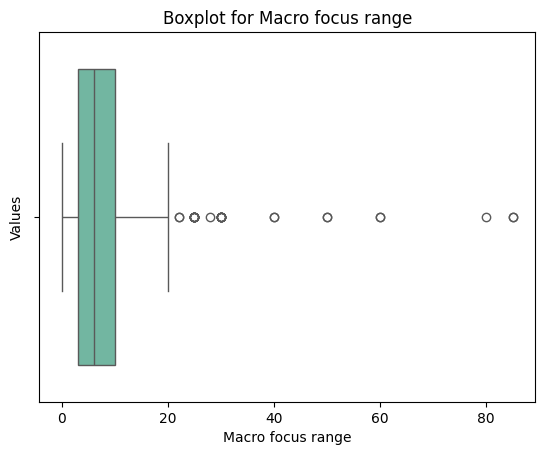

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


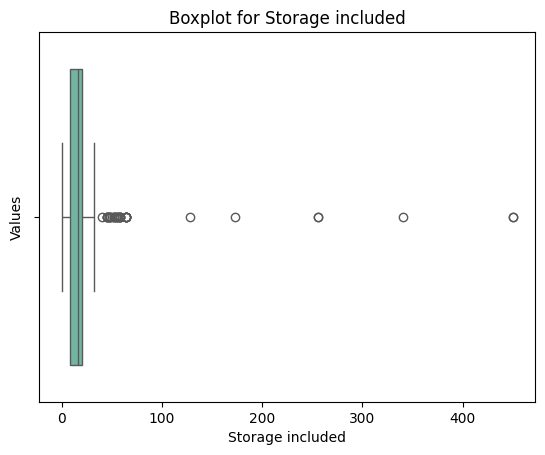

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


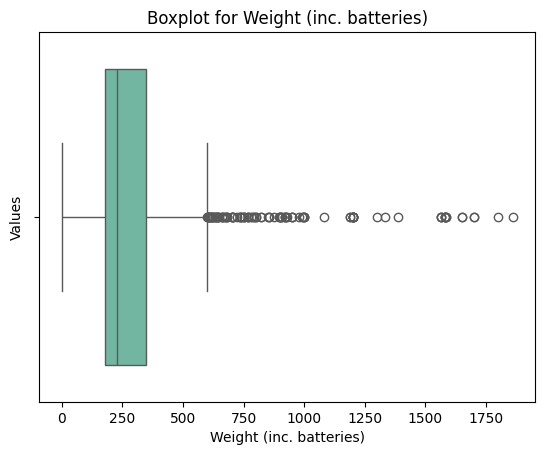

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


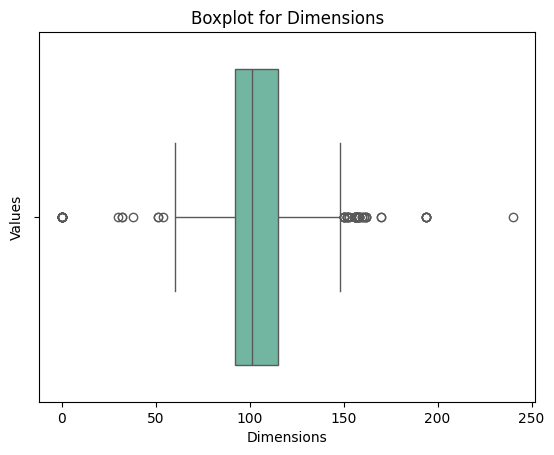

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-338-d756e0485ece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], orient="v", palette="Set2")


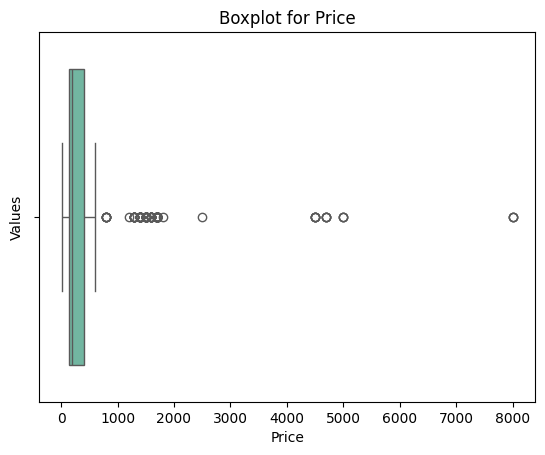

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
columns_of_interest = ['Max resolution', 'Low resolution', 'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range', 'Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions', 'Price']

# Create boxplots for the selected columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for column in columns_of_interest:
    sns.boxplot(x=data[column], orient="v", palette="Set2")
    plt.title(f"Boxplot for {column}")
    plt.ylabel("Values")
    plt.xlabel(column)
    plt.show()


0.75    3072.0
0.25    2048.0
Name: Max resolution, dtype: float64
3072.0
2048.0
1024.0
4608.0
512.0


<Axes: ylabel='Max resolution'>

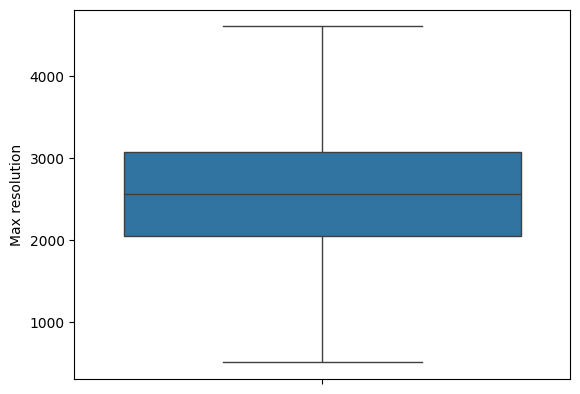

In [339]:
quant=data['Max resolution'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Max resolution']=np.where(data['Max resolution']>4608.0,4608.0,data['Max resolution'])
data['Max resolution']=np.where(data['Max resolution']<512.0,512.0,data['Max resolution'])
sns.boxplot(data['Max resolution'])

0.75    2560.0
0.25    1120.0
Name: Low resolution, dtype: float64
2560.0
1120.0
1440.0
4720.0
-1040.0


<Axes: ylabel='Low resolution'>

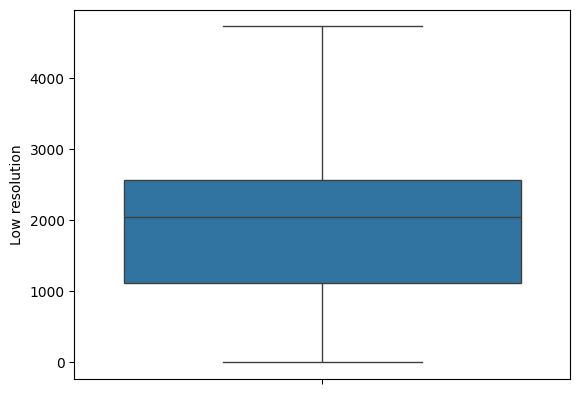

In [340]:
quant=data['Low resolution'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Low resolution']=np.where(data['Low resolution']>4720.0,4720.0,data['Low resolution'])
sns.boxplot(data['Low resolution'])

0.75    7.0
0.25    3.0
Name: Effective pixels, dtype: float64
7.0
3.0
4.0
13.0
-3.0


<Axes: ylabel='Effective pixels'>

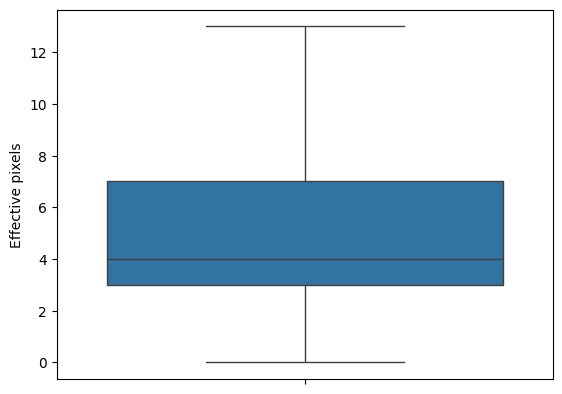

In [341]:
quant=data['Effective pixels'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Effective pixels']=np.where(data['Effective pixels']>13.0,13.0,data['Effective pixels'])
sns.boxplot(data['Effective pixels'])

0.75    38.0
0.25    35.0
Name: Zoom wide (W), dtype: float64
38.0
35.0
3.0
42.5
30.5


<Axes: ylabel='Zoom wide (w)'>

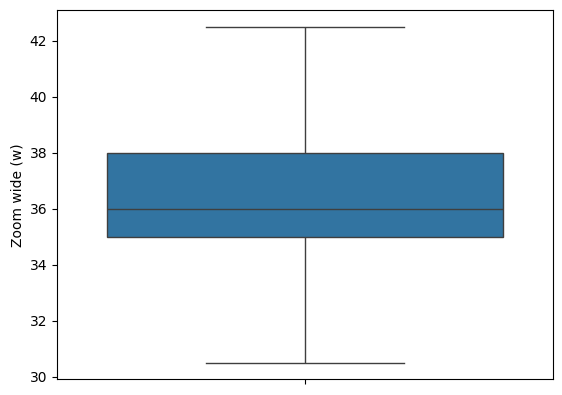

In [342]:
quant=data['Zoom wide (W)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Zoom wide (W)']=np.where(data['Zoom wide (W)']>42.5,42.5,data['Zoom wide (W)'])
data['Zoom wide (w)']=np.where(data['Zoom wide (W)']<30.5,30.5,data['Zoom wide (W)'])
sns.boxplot(data['Zoom wide (w)'])

0.75    117.0
0.25     96.0
Name: Zoom tele (T), dtype: float64
117.0
96.0
21.0
148.5
64.5


<Axes: ylabel='Zoom tele (T)'>

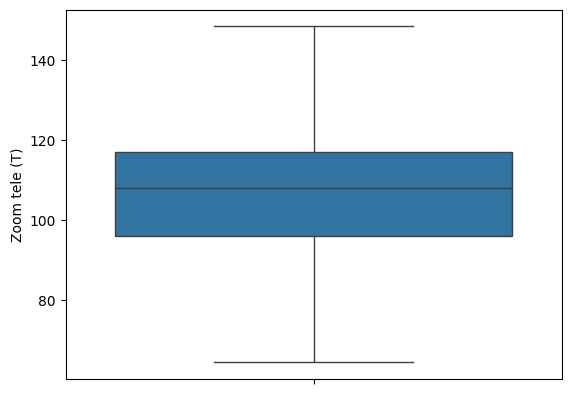

In [343]:
quant=data['Zoom tele (T)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Zoom tele (T)']=np.where(data['Zoom tele (T)']>148.5,148.5, data['Zoom tele (T)'])
data['Zoom tele (T)']=np.where(data['Zoom tele (T)']<64.5,64.5,data['Zoom tele (T)'])
sns.boxplot(data['Zoom tele (T)'])

0.75    60.0
0.25    30.0
Name: Normal focus range, dtype: float64
60.0
30.0
30.0
105.0
-15.0


<Axes: ylabel='Normal focus range'>

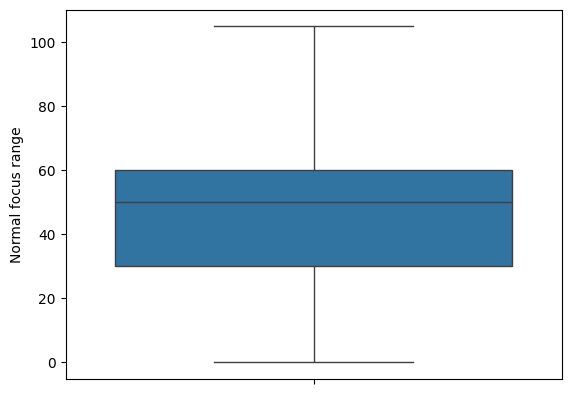

In [344]:
quant=data['Normal focus range'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Normal focus range']=np.where(data['Normal focus range']>105.0,105.0,data['Normal focus range'])
sns.boxplot(data['Normal focus range'])

0.75    60.0
0.25    30.0
Name: Normal focus range, dtype: float64
60.0
30.0
30.0
105.0
-15.0


<Axes: ylabel='Normal focus range'>

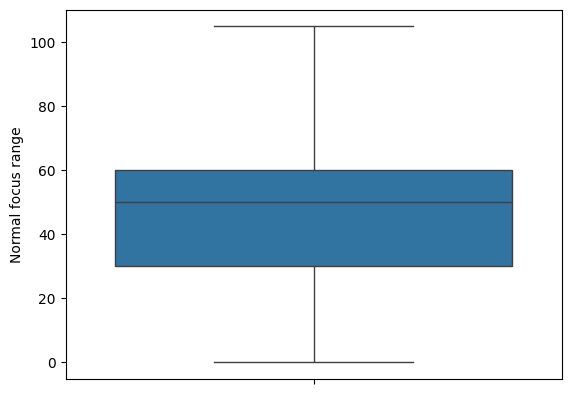

In [345]:
quant=data['Normal focus range'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Normal focus range']=np.where(data['Normal focus range']>105.0,105.0,data['Normal focus range'])
sns.boxplot(data['Normal focus range'])

0.75    10.0
0.25     3.0
Name: Macro focus range, dtype: float64
10.0
3.0
7.0
20.5
-7.5


<Axes: ylabel='Macro focus range'>

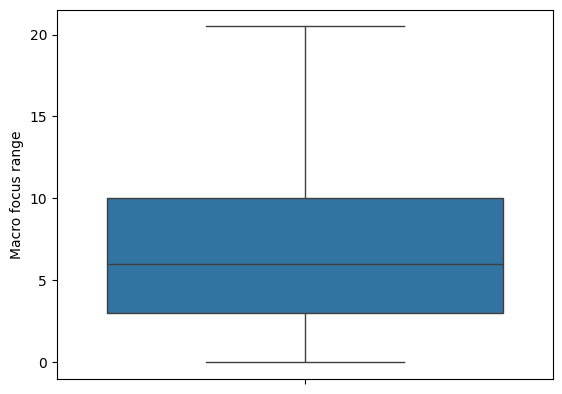

In [346]:
quant=data['Macro focus range'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Macro focus range']=np.where(data['Macro focus range']>20.5,20.5, data['Macro focus range'])
sns.boxplot(data['Macro focus range'])

0.75    20.0
0.25     8.0
Name: Storage included, dtype: float64
20.0
8.0
12.0
38.0
-10.0


<Axes: ylabel='Storage included'>

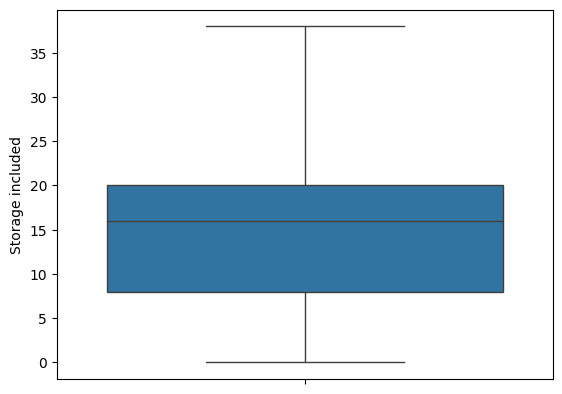

In [347]:
quant=data['Storage included'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Storage included']=np.where(data['Storage included']>38.0,38.0,data['Storage included'])
sns.boxplot(data['Storage included'])

0.75    347.5
0.25    180.0
Name: Weight (inc. batteries), dtype: float64
347.5
180.0
167.5
598.75
-71.25


<Axes: ylabel='Weight (inc. batteries)'>

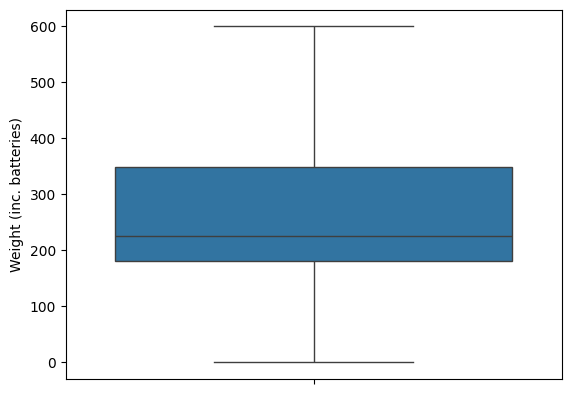

In [348]:
quant=data['Weight (inc. batteries)'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Weight (inc. batteries)']=np.where(data['Weight (inc. batteries)']>598.75,598.75,data['Weight (inc. batteries)'])
sns.boxplot(data['Weight (inc. batteries)'])

0.75    115.0
0.25     92.0
Name: Dimensions, dtype: float64
115.0
92.0
23.0
149.5
57.5


<Axes: ylabel='Dimensions'>

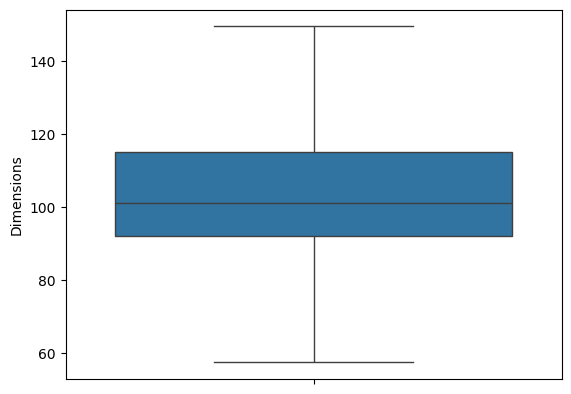

In [349]:
quant=data['Dimensions'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)
data['Dimensions']=np.where(data['Dimensions' ]>149.5, 149.5, data['Dimensions'])
data['Dimensions' ]=np.where(data['Dimensions' ]<57.5, 57.5, data['Dimensions'])
sns. boxplot(data['Dimensions'])

In [350]:
features=['Max resolution', 'Low resolution', 'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range', 'Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions', 'Price']

In [351]:
x=data[features]
y=data['Price']

In [352]:
scaler=StandardScaler()
x_normalized=scaler.fit_transform(x)

Splitting the data

In [353]:
x_train, x_test,y_train, y_test=train_test_split(x_normalized, y, test_size=0.2, random_state=42)

In [354]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
linear_reg_pred = linear_reg_model.predict(x_test)

linear_reg_r2_score = r2_score(y_test, linear_reg_pred)

print("r2_score of model %.2f"%r2_score(y_test, linear_reg_pred))

r2_score of model 1.00


In [355]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(x_train, y_train)
knn_pred = knn_regressor.predict(x_test)
r2 = r2_score(y_test, knn_pred)

print("R-squared:", r2)

R-squared: 0.7905971244913848


In [356]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

dt_r2_score = r2_score(y_test, dt_pred)
print("r2_score of model %.2f"%r2_score(y_test,dt_pred))

r2_score of model 1.00


In [357]:
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(x_train, y_train)
reg_pred = reg_model.predict(x_test)

reg_r2_score = r2_score(y_test, reg_pred)

print("r2_score of model %.2f"%r2_score(y_test,reg_pred))

r2_score of model 1.00


In [358]:
pip install xgboost

In [359]:
import xgboost

In [360]:
xgb = xgboost.XGBRegressor()

In [361]:
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

xgb_r2_score = r2_score(y_test, xgb_pred)
print("r2_score of model %.2f"%r2_score(y_test,xgb_pred))

r2_score of model 1.00


In [362]:


r2_score_data = pd.DataFrame({'model': ['linear regression', 'decision tree', 'random forest', 'k-nearest neighbour', 'xgboost'],
                              'r2_score': [linear_reg_r2_score, dt_r2_score, reg_r2_score, r2, xgb_r2_score]})
print(r2_score_data)


                 model  r2_score
0    linear regression  1.000000
1        decision tree  0.999999
2        random forest  0.997318
3  k-nearest neighbour  0.790597
4              xgboost  0.999999


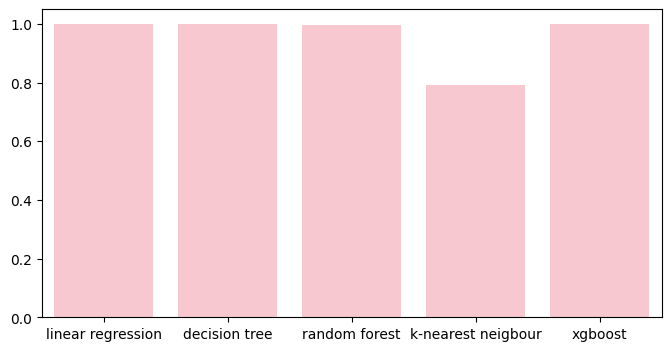

In [363]:
plt.figure(figsize=(8, 4))
models=['linear regression','decision tree', 'random forest','k-nearest neigbour', 'xgboost']
r2_score=[linear_reg_r2_score,dt_r2_score, reg_r2_score, r2,xgb_r2_score]
sns.barplot(x=models,y=r2_score, color='pink')
plt. show()

In [364]:
import pickle
pickle.dump(linear_reg_model,open("model.pkl","wb"))

In [365]:
print(linear_reg_model.predict([[4608.0,640.0,0.0,42.0,114.0,70.0,20.5,4.0,420.0,150.0,0.0]]))

[457.38439307]
